# WDRO

In [1]:
import numpy as np
import os
# Set the new path
new_path = "/Users/wty6162/Desktop/DRO_solver/dro"
# Change the current working directory
os.chdir(new_path)
from dro.src.linear_model.chi2_dro import *
from dro.src.linear_model.Wasserstein_DRO import *


# Classification Task

## Load Data

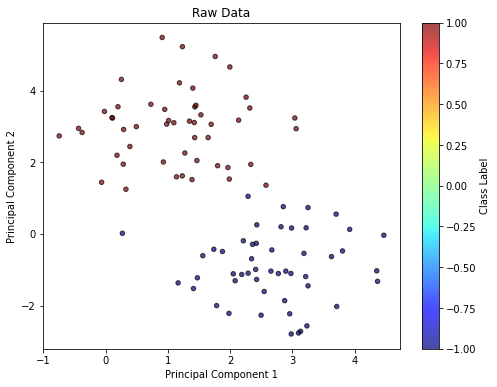

In [10]:
from dro.src.data.dataloader_regression import regression_basic
from dro.src.data.dataloader_classification import classification_basic
from dro.src.data.draw_utils import draw_classification

X, y = classification_basic(d = 2, num_samples = 100, radius = 3, visualize = False)
draw_classification(X, y, title = 'Raw Data')

## Model Fit
Recall $X$ being the feature and $Y$ being the outcome, we allow both $Y = \theta^{\top}X$ and $Y = \theta^{\top}X + b$ by setting ``fit_intercept`` (default = True).

In [21]:
clf_model1 = WassersteinDRO(input_dim = 2, model_type = 'logistic')
clf_model1.update({'eps': 0.1, 'kappa': 'inf'})
clf_model1.fit(X, y)

{'theta': [-1.2080033634343326, 1.2080033651301767], 'b': array(1.15966124)}

## Worst-case Distribution and Visualization
For SVM / Logistic / LAD, we provide two different worst-case distribution computations, 1 stands for asymptotic approximation, 2 stands for the exact calculation while requiring solving n optimization problems.

[6.05127084e-11 8.09877239e-11 0.00000000e+00 6.18740229e-11
 9.99999999e-01 0.00000000e+00 0.00000000e+00 8.86222641e-11
 1.98821395e-10 2.14288576e-10 4.59793317e-11 0.00000000e+00
 5.36600904e-11 0.00000000e+00 1.22770611e-10 7.50647962e-10
 9.99999997e-01 0.00000000e+00 7.59757167e-11 6.61366487e-11
 4.71260744e-11 0.00000000e+00 3.02062165e-09 8.79203145e-11
 0.00000000e+00 5.69066286e-11 4.95120317e-11 0.00000000e+00
 5.35145682e-11 6.91563339e-11 0.00000000e+00 0.00000000e+00
 1.11314380e-10 0.00000000e+00 0.00000000e+00 0.00000000e+00
 7.28624277e-11 1.17282434e-02 4.63855369e-11 3.79915887e-10
 5.46411306e-11 7.54263708e-11 0.00000000e+00 0.00000000e+00
 5.24936827e-11 1.35330209e-10 5.87498026e-11 6.73882542e-11
 0.00000000e+00 8.01410236e-11 6.94972126e-11 0.00000000e+00
 4.65056641e-11 1.66241423e-10 9.99999998e-01 6.64886156e-11
 0.00000000e+00 4.84046513e-11 0.00000000e+00 0.00000000e+00
 2.07520363e-10 5.94239235e-11 0.00000000e+00 1.30005052e-10
 1.30305181e-10 4.882717

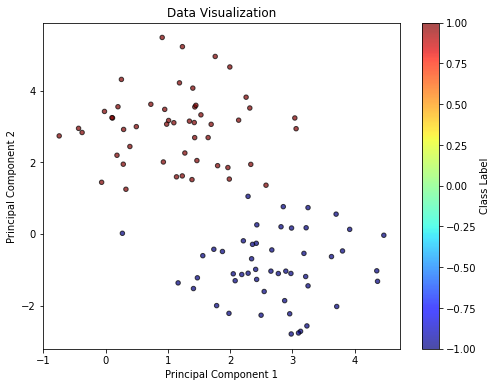

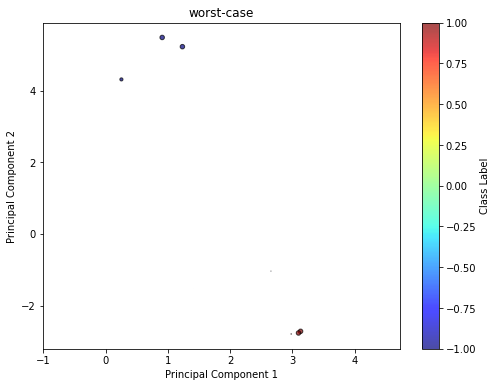

In [56]:
clf_model1.update({'eps': 0.1, 'kappa': 2})

worst_case_log = clf_model1.worst_distribution(X, y, 'asymp', 0.01)
draw_classification(X, y)
draw_classification(worst_case_log['sample_pts'][0][100:], worst_case_log['sample_pts'][1][100:], weight = worst_case_log['weight'][100:], title = 'worst-case', scale = 20)


In [6]:
len(worst_case_log['sample_pts'][0])

100

In [18]:
worst_case_log

{'sample_pts': [array([[ 1.69259393e+00, -7.70462261e-01],
         [ 3.50596012e+00,  2.31109425e-01],
         [ 1.45727292e+00,  6.23473917e-03],
         [ 1.46332961e+00, -1.00205506e+00],
         [ 2.16870957e+00, -2.44960555e+00],
         [ 2.01829470e-01, -1.09861283e+00],
         [ 9.13916182e-01, -2.22077972e-01],
         [ 1.01872323e+00, -1.94862901e+00],
         [ 3.39239607e+00, -7.62101605e-01],
         [ 1.99427551e+00, -1.96107349e+00],
         [ 1.38236458e+00, -4.25402715e-01],
         [ 7.75753725e-01, -1.60627286e-01],
         [ 1.32610861e+00, -8.28019054e-01],
         [ 1.32504069e+00,  1.31595288e+00],
         [ 1.91325008e+00, -1.59403623e+00],
         [ 2.74929221e+00, -1.75716895e+00],
         [ 2.13561090e+00, -2.49599543e+00],
         [ 5.98561254e-01, -3.39464069e-01],
         [ 2.66521388e+00, -3.64957023e-01],
         [ 1.81109902e+00, -8.37429000e-01],
         [ 4.48225312e-01, -1.25616951e+00],
         [ 1.46610853e+00,  5.20796922e-0

## Robust Satisificng version of Wasserstein DRO
 

In [4]:
import numpy as np
import os
os.chdir('/Users/wty6162/Desktop/DRO_solver')
from dro.src.linear_model.Wasserstein_DRO import *

clf_model_rs = Wasserstein_DRO_satisficing(input_dim = 2, model_type = 'svm')
clf_model_rs.fit(X, y)


{'theta': [-0.3365834154114554, 6.700882661679504]}

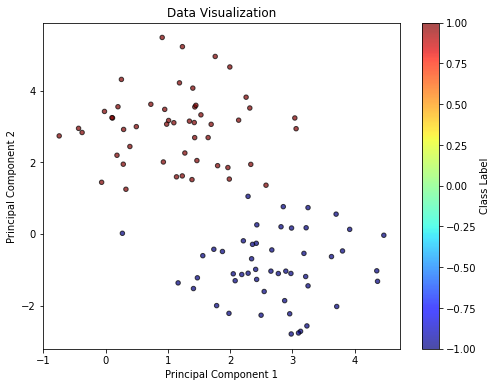

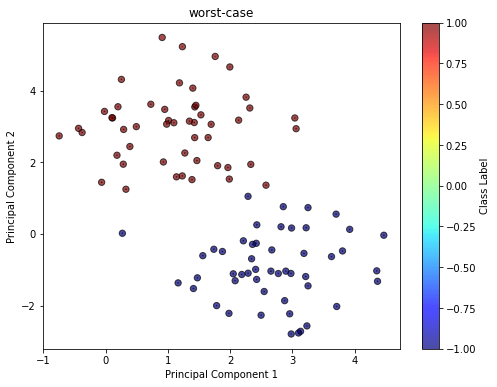

In [3]:
import numpy as np
import os
os.chdir('/Users/wty6162/Desktop/DRO_solver')
from dro.src.linear_model.Wasserstein_DRO import *

from dro.src.data.dataloader_regression import regression_basic
from dro.src.data.dataloader_classification import classification_basic
from dro.src.data.draw_utils import draw_classification

X, y = classification_basic(d = 2, num_samples = 100, radius = 3, visualize = False)
# draw_classification(X, y, title = 'Raw Data')

clf_model1 = WassersteinDRO(input_dim = 2, model_type = 'logistic')
clf_model1.fit_intercept = False
clf_model1.update({'eps': 1.5, 'p': 'inf', 'kappa': 10})
clf_model1.fit(X, y)

worst_case_log = clf_model1.worst_distribution(X, y, 1)

draw_classification(X, y)
draw_classification(worst_case_log['sample_pts'][0], worst_case_log['sample_pts'][1], weight = worst_case_log['weight'], title = 'worst-case')

# Regression Task
We can construct similar models for Wasserstein DRO regression models, including ``lad`` and ``ols`` loss.

In [2]:
import numpy as np
import os
# Set the new path
new_path = "/Users/wty6162/Desktop/DRO_solver/dro"
# Change the current working directory
os.chdir(new_path)

from dro.src.linear_model.Wasserstein_DRO import *
from dro.src.data.dataloader_regression import regression_basic

feature_dim = 5
X, y = regression_basic(num_samples = 100, d = feature_dim, noise = 1)

reg_model = WassersteinDRO(input_dim = feature_dim, model_type = 'lad')

costM = np.identity(feature_dim)
costM[0][0] = 1
reg_model.update({'cost_matrix': costM, 'eps': 1, 'p':2, 'kappa': 0.001})
print(reg_model.fit(X, y))

reg_model.update({'cost_matrix': costM, 'eps': 1, 'p':2, 'kappa': 'inf'})
print(reg_model.fit(X, y))

reg_model.update({'cost_matrix': costM, 'eps': 1, 'p':1, 'kappa': 'inf'})
print(reg_model.fit(X, y))


AttributeError: module 'distutils.ccompiler' has no attribute '_default_compilers'

In [2]:
reg_model.update({'cost_matrix': costM, 'eps': 1, 'p':2, 'kappa': 'inf'})
worst_case_log = reg_model.worst_distribution(X, y, 'asymp', 0.01)
worst_case_log['sample_pts'][0][-1]

array([ 0.97511973, -0.67716171, -0.01224677, -0.89725437,  0.07580456])